In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Plot de árvore
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import metrics

### Material complementar de leitura para entendimento das features

#### https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf

### Lendo o dataset

In [104]:
data = pd.read_csv('/home/silva/Downloads/breast-cancer.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Verificação dos dados

In [105]:
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [107]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [108]:
df = data.copy()
df = data.drop('Unnamed: 32',axis = 1 )
df = df.drop('id',axis = 1 )
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [109]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [110]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

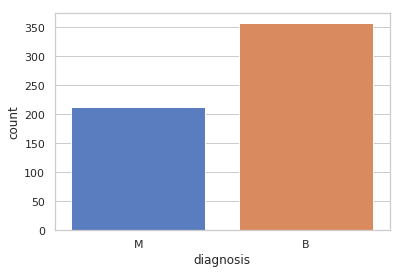

In [111]:
sns.countplot(df['diagnosis'],label="Count") 

## Realizando Balanceamento dos Dados

In [112]:
#Counting registry number of each class 
b_count, m_count = df['diagnosis'].value_counts()

#Splitting by class
df_b = df[df['diagnosis'] == 'B']
df_m = df[df['diagnosis'] == 'M']

#Cutting dataset for "under-sampling"
df_b = df_b.sample(m_count)

#Re-join
df_manipulated = pd.concat([df_b, df_m], axis=0)

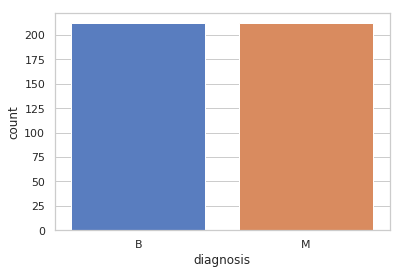

In [113]:
sns.countplot(df_manipulated['diagnosis'],label="Count") 

## Explorando o dataset

### Conhecendo os dados

In [114]:
df_manipulated.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,14.863108,19.837429,97.102052,724.598821,0.097389,0.112890,0.104276,0.057203,0.183937,0.062648,...,17.329618,26.515283,114.619387,996.232783,0.134278,0.278839,0.310903,0.129226,0.296728,0.085231
std,3.652762,4.208241,25.213617,374.642875,0.013904,0.055230,0.084107,0.040807,0.028096,0.007282,...,5.050886,6.075621,35.144586,610.708159,0.023428,0.166043,0.214782,0.067208,0.065976,0.019047
min,7.691000,10.380000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,14.100000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.195000,16.937500,78.290000,459.700000,0.087557,0.071913,0.036520,0.023407,0.163800,0.057150,...,13.367500,22.055000,87.375000,549.875000,0.119000,0.164125,0.145750,0.074215,0.255475,0.071873
50%,14.025000,19.540000,91.325000,604.950000,0.097410,0.103500,0.087335,0.050035,0.181250,0.061420,...,16.155000,26.080000,106.100000,793.800000,0.134250,0.234600,0.280250,0.123850,0.285450,0.080785
75%,17.312500,22.167500,114.200000,931.450000,0.106425,0.144350,0.152550,0.086260,0.197600,0.066090,...,20.585000,30.737500,137.950000,1302.500000,0.149100,0.366775,0.423825,0.182000,0.321700,0.094510
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Standardizing to Plot

In [115]:
def standardized(df_features):
    df_standardized = (df_features - df_features.mean()) / (df_features.std()) 
    return df_standardized

def plot_boxplot(df_class, df_features_standardized, w, h):
    df_standardized = pd.concat([df_class,df_features_standardized],axis=1)
    df_melted = pd.melt(df_standardized,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=(w,h))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df_melted)

### Verificando cada uma das features

In [116]:
df_class = df_manipulated.diagnosis 
df_features = df_manipulated.drop('diagnosis', axis=1)
df_standardized = standardized(df_features)

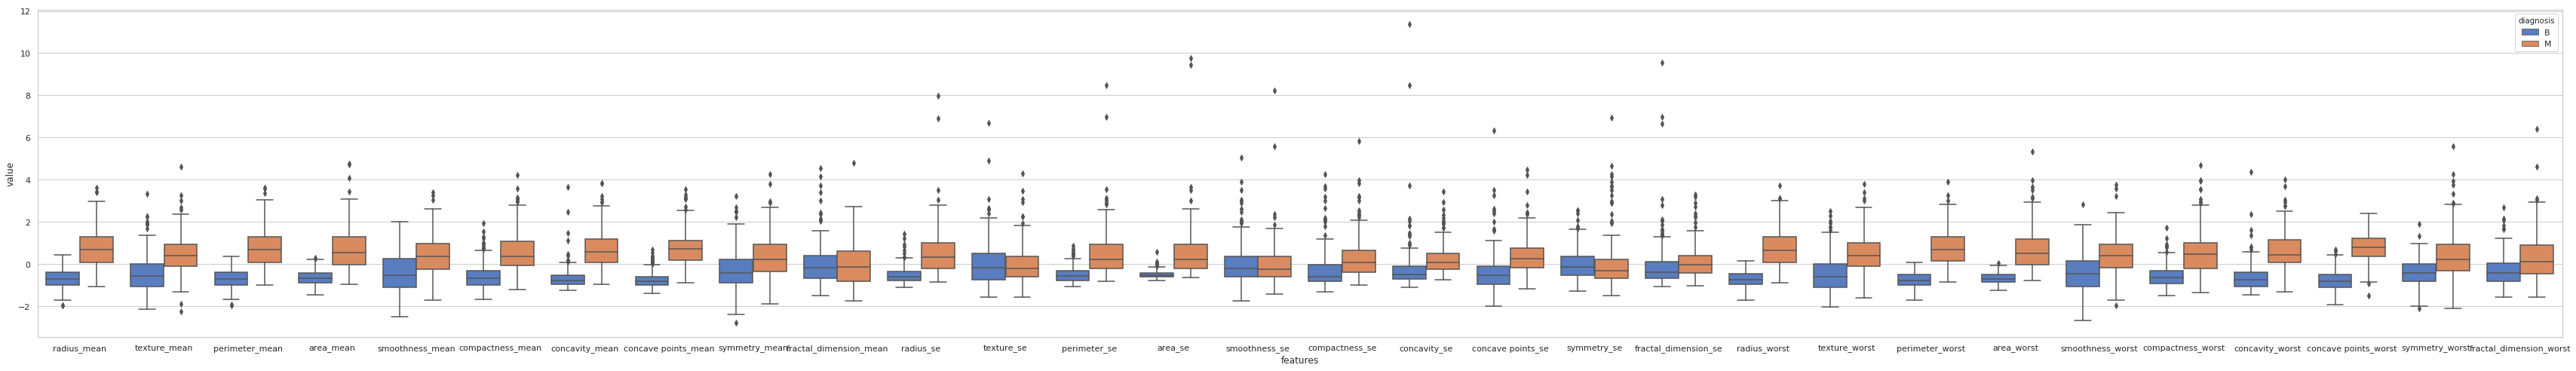

In [117]:
plot_boxplot(df_class, df_standardized, 60, 8)

#### Removendo Colunas com baixa variação entre as populações

In [118]:
columns_without_variation = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']
columns_without_variation

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

In [119]:
df_manipulated = df_manipulated.drop(columns=columns_without_variation)
df_manipulated.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
547,B,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,...,10.83,22.04,71.08,357.4,0.14610,0.2246,0.1783,0.08333,0.2691,0.09479
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.2167,0.1565,0.07530,0.2636,0.07676


In [120]:
corr = df_manipulated.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.328381,0.997675,0.988282,0.196063,0.489972,0.667772,0.817343,0.139325,0.686682,...,0.965671,0.281550,0.961332,0.939328,0.139112,0.374931,0.500474,0.725267,0.140805,-0.007893
texture_mean,0.328381,1.000000,0.334383,0.321392,0.017669,0.242382,0.297848,0.297505,0.069875,0.261294,...,0.355634,0.896975,0.363158,0.343285,0.122074,0.285480,0.302231,0.301076,0.096466,0.129946
perimeter_mean,0.997675,0.334383,1.000000,0.986933,0.235736,0.543287,0.708728,0.847245,0.177444,0.699105,...,0.965077,0.288206,0.966572,0.938867,0.171485,0.418846,0.538779,0.753525,0.166670,0.036976
area_mean,0.988282,0.321392,0.986933,1.000000,0.197069,0.478515,0.672999,0.813626,0.137136,0.735288,...,0.957302,0.267364,0.953709,0.954402,0.132299,0.348498,0.482777,0.699743,0.112644,-0.017187
smoothness_mean,0.196063,0.017669,0.235736,0.197069,1.000000,0.686549,0.582441,0.595053,0.564251,0.309767,...,0.237693,0.083827,0.266508,0.223619,0.805986,0.506553,0.493029,0.544818,0.407928,0.524362
compactness_mean,0.489972,0.242382,0.543287,0.478515,0.686549,1.000000,0.880661,0.828533,0.622262,0.482163,...,0.517142,0.252058,0.575278,0.487289,0.587493,0.858850,0.810746,0.810857,0.512243,0.687257
concavity_mean,0.667772,0.297848,0.708728,0.672999,0.582441,0.880661,1.000000,0.923505,0.518621,0.622263,...,0.672132,0.285601,0.715587,0.655913,0.482483,0.728760,0.873110,0.853678,0.399838,0.499796
concave points_mean,0.817343,0.297505,0.847245,0.813626,0.595053,0.828533,0.923505,1.000000,0.470507,0.687968,...,0.818841,0.284321,0.846654,0.794066,0.474398,0.643607,0.743491,0.902031,0.358882,0.362152
symmetry_mean,0.139325,0.069875,0.177444,0.137136,0.564251,0.622262,0.518621,0.470507,1.000000,0.282353,...,0.175694,0.093640,0.212964,0.160233,0.422344,0.490186,0.452486,0.443334,0.707135,0.460665
radius_se,0.686682,0.261294,0.699105,0.735288,0.309767,0.482163,0.622263,0.687968,0.282353,1.000000,...,0.714111,0.153929,0.719665,0.747169,0.127110,0.254406,0.356849,0.513428,0.055982,0.025393


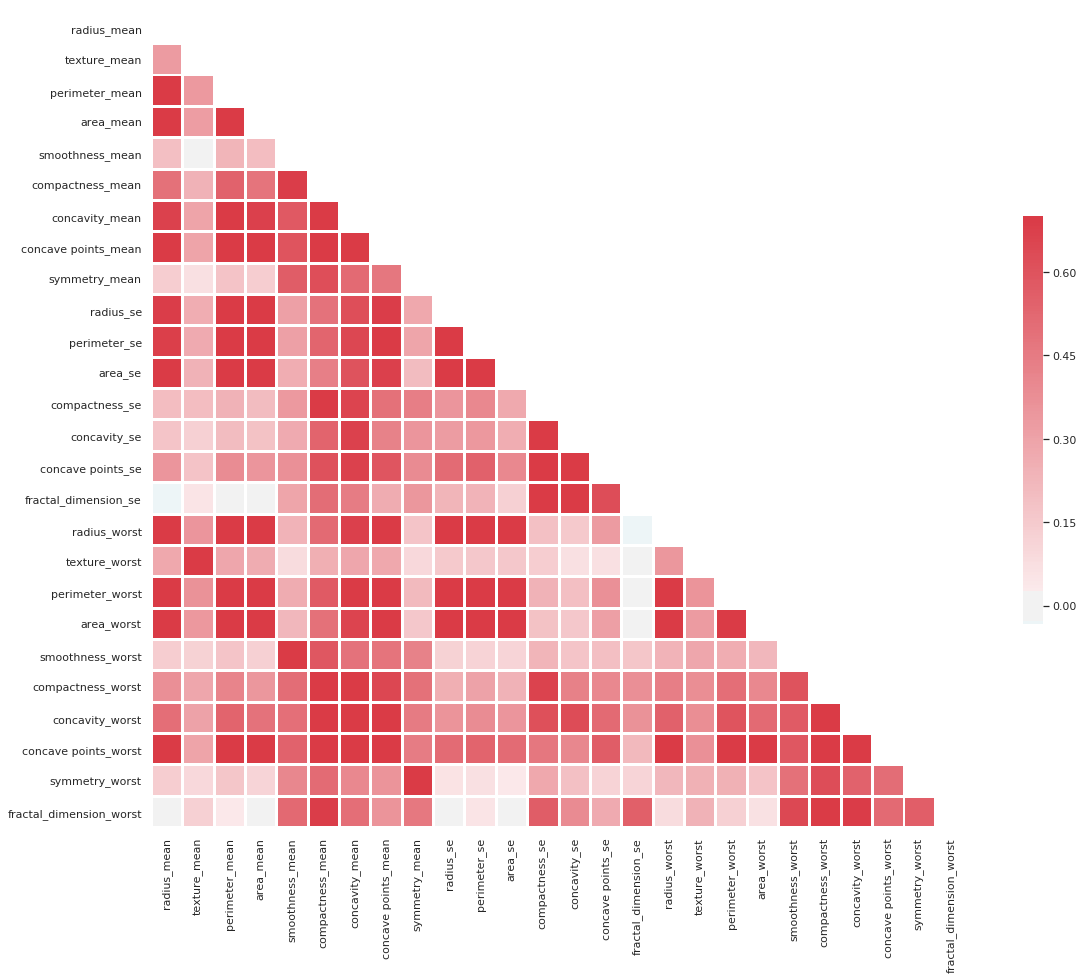

In [121]:
# Generate a mask for the upper triangle
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .5})

### Filtrando o dataset

In [122]:
high_correlated_columns = ["radius_se", "perimeter_se", "area_se", "compactness_se", "concavity_se", "concave points_se", "fractal_dimension_se", "texture_se", "smoothness_se", "symmetry_se", "radius_worst", "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst", "concave points_worst", "fractal_dimension_worst", "texture_worst",	"smoothness_worst",	"symmetry_worst"]
df_filtered = df.drop(high_correlated_columns, axis=1)
df_filtered.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


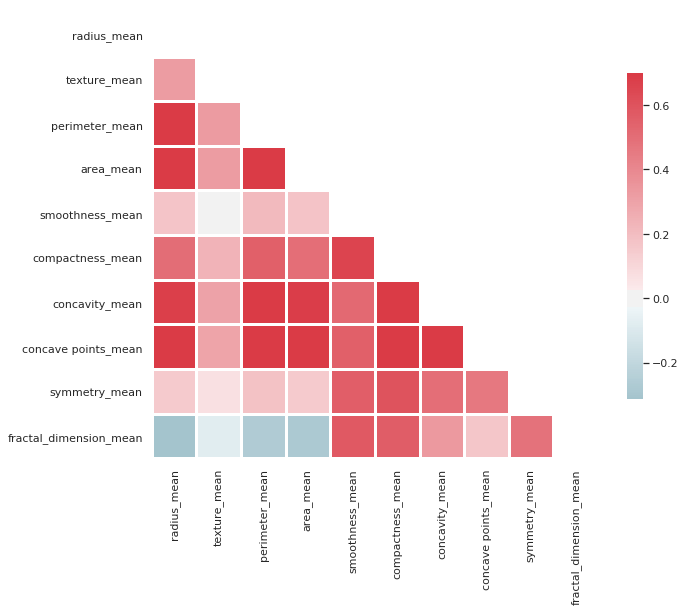

In [123]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(df_filtered.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_filtered.corr(), mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .6})

## Hipóteses

### 1) Há diferença significativa de variação no raio do tumor, entre a população com maligno e  benigno?

#### "The radius of an individual nucleus is measured by averaging the length of the radial line segments dened by the centroid of the snake and the individual snake points."

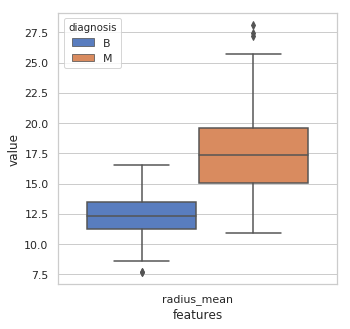

In [124]:
plot_boxplot(df_class, df_manipulated['radius_mean'], 5, 5)

In [125]:
sns.set(style="whitegrid", palette="muted")
df_melted = pd.melt(df_manipulated,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

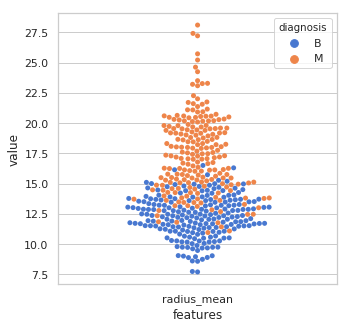

In [126]:
plt.figure(figsize=(5,5))
sns.swarmplot(x="features", y="value", hue="diagnosis",data=df_melted[df_melted['features'] == 'radius_mean'])

#### Teste Anova

In [127]:
model = ols("radius_mean ~ diagnosis", data=df_manipulated).fit()
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

              df       sum_sq      mean_sq          F        PR(>F)
diagnosis    1.0  2865.626433  2865.626433  435.26044  6.156741e-67
Residual   422.0  2778.323606     6.583705        NaN           NaN


#### Conclusão: Ao nível de significância de 5%, podemos afirmar que o tamanho do raio é um diferencial no diagnóstico, havendo uma forte relaçao.

#

### 2) É possível criar um modelo usando apenas o raio do tumor?

In [128]:
df_for_inference = df_manipulated[['radius_mean', 'diagnosis']]
x_inf = df_for_inference.drop('diagnosis',axis=1)
y_inf = df_for_inference['diagnosis']
x_train_inf, x_test_inf, y_train_inf, y_test_inf = train_test_split(x_inf, y_inf, train_size=0.20, random_state=101)
dtc_inf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1, max_features=1,)

In [129]:
dtc_inf = dtc_inf.fit(x_train_inf, y_train_inf)
dtc_inf.score(x_test_inf, y_test_inf)

0.8441176470588235

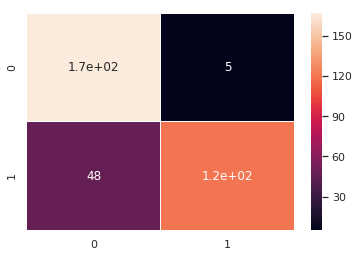

In [130]:
cm_inf = confusion_matrix(y_test_inf, dtc_inf.predict(x_test_inf))
sns.heatmap(cm_inf, linewidths=.5, annot=True, yticklabels=True)

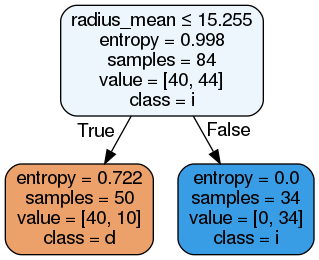

In [131]:
dot_data = StringIO()
tree.export_graphviz(dtc_inf, 
                out_file=dot_data,  
                feature_names=list(x_inf.columns.values),
                class_names= 'diagnosis',
                filled=True, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [132]:
metrics.accuracy_score(dtc_inf.predict(x_test_inf),y_test_inf)

0.8441176470588235

#### Conclusão: A acurácia do modelo usando radius_mean é: 0.8588235294117647, porém há um desbalanceamento entre falso-positivos e falso-negativos

In [133]:
def make_diagnosis_binary(x):
    if x == 'M':
        return 1
    return 0